## 1. Imports


In [78]:
import sys
sys.path.append('../')
from scripts.visualization_utils import impact_bar_plots

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns;

In [79]:
data_path = '../results/syn_raw/bi/'
folders= ['dt','gnb','lgr','gbt']
#folders = ['dt',]

## 2. Delayed Impact plots

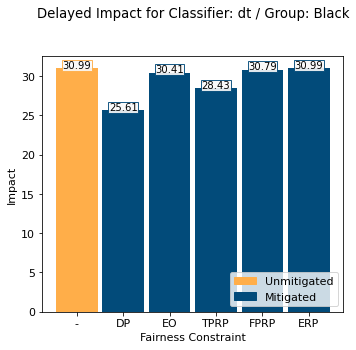

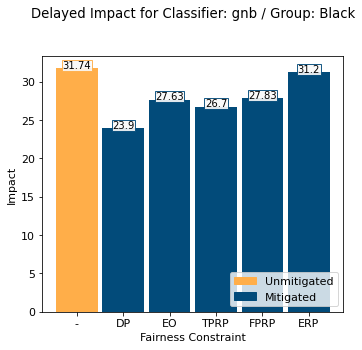

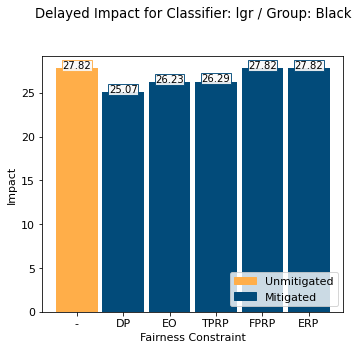

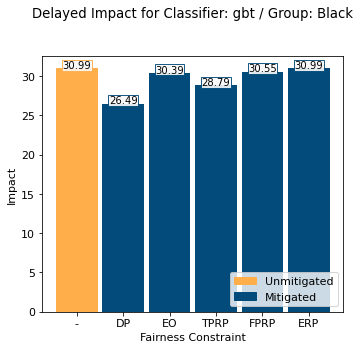

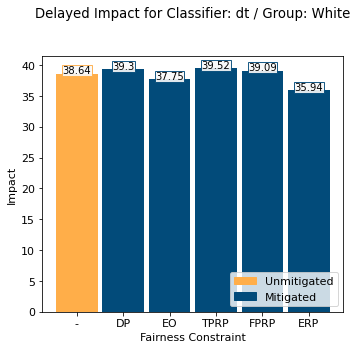

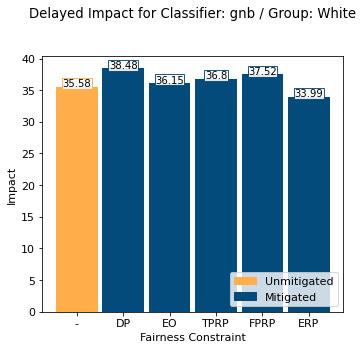

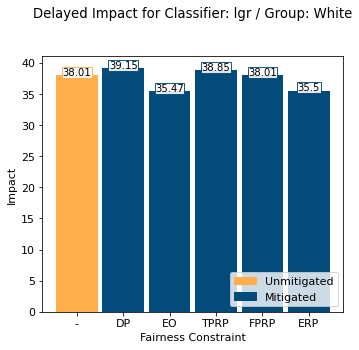

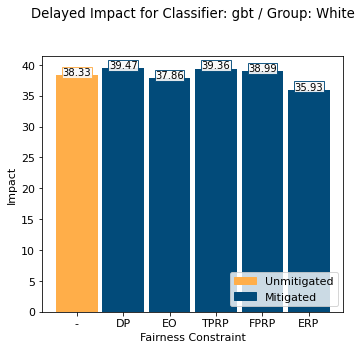

In [80]:
impact_bar_plots(data_path,'Black',folders)
impact_bar_plots(data_path,'White',folders)

## 3. Comparison of Loans Quantitys

In [81]:
# Types Dataframes
classifier_dfs = {}
dfs_b = {}
dfs_w = {}

for f in folders:
    path = f'{data_path}{f}/{f}_type_ratios.csv'
    df = pd.read_csv(path)
    df = df.set_index('Category')
    classifier_dfs[f] = df
    df_black = df.filter(like='B')
    df_white = df.filter(like='W') 
    dfs_b[f] = df_black
    dfs_w[f] = df_white

    
print(classifier_dfs['gnb'])

            dpB    dpW    eoB    eoW   erpB   erpW  fprpB  fprpW  testB  \
Category                                                                  
FN        0.047  0.048  0.066  0.064  0.103  0.058  0.071  0.035  0.000   
FP        0.139  0.069  0.107  0.078  0.062  0.095  0.101  0.081  0.000   
TN        0.198  0.173  0.230  0.164  0.275  0.146  0.237  0.160  0.337   
TP        0.616  0.710  0.596  0.694  0.560  0.701  0.591  0.723  0.663   

          testW  tprpB  tprpW  unmitB  unmitW  
Category                                       
FN        0.000  0.059  0.058   0.107   0.023  
FP        0.000  0.114  0.076   0.057   0.100  
TN        0.242  0.223  0.166   0.281   0.141  
TP        0.758  0.603  0.700   0.556   0.735  


In [82]:
def visualize_tpfp(dfs_list = []):
    for dfs in dfs_list:

        for c,df in dfs.items():
            
                
            df = df.loc[['TP','FP'],:]
            df = df.transpose()
            
            ax = df.plot.bar(stacked=True)
            ax.set_title(f'Percentage of TP & FP for all Models for Classifier: {c} \n')
           
            ax.set_xlabel('Model')
            ax.set_ylabel('Value')

def visualize_tnfn(dfs_list = []):
    for dfs in dfs_list:

        for c,df in dfs.items():
            
                
            df = df.loc[['TP','FP'],:]
            df = df.transpose()
            
            ax = df.plot.bar(stacked=True)
            ax.set_title(f'Percentage of TN & FN for all Models for Classifier: {c} \n')
           
            ax.set_xlabel('Model')
            ax.set_ylabel('Value')


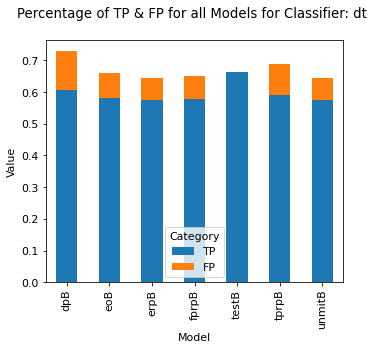

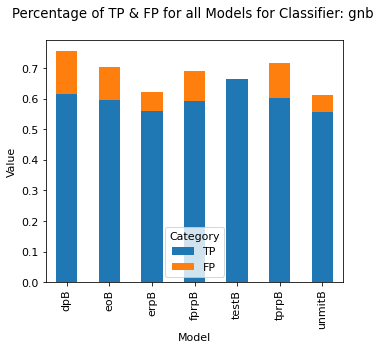

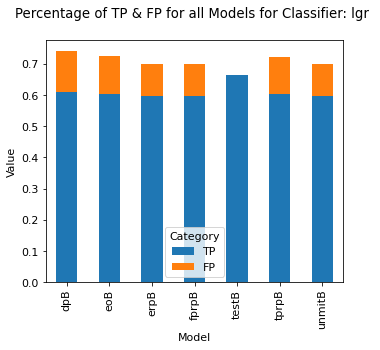

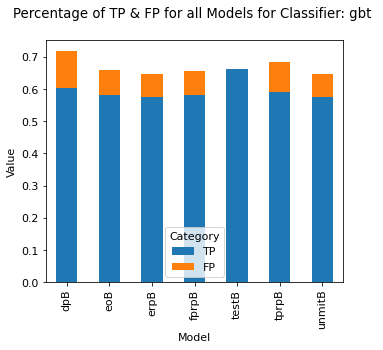

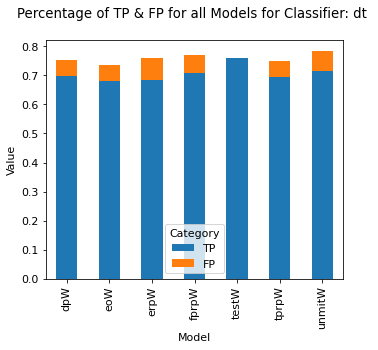

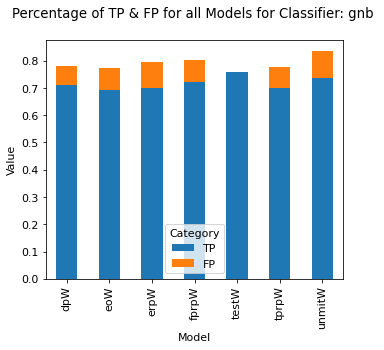

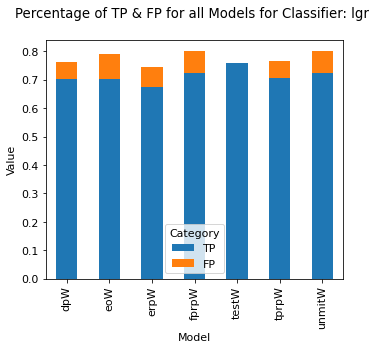

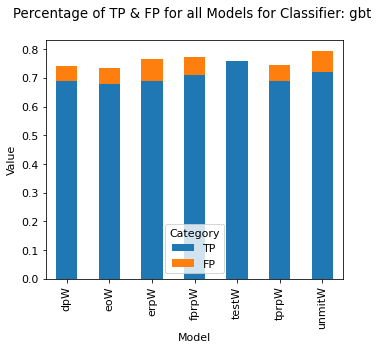

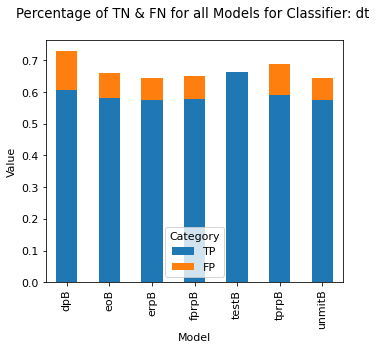

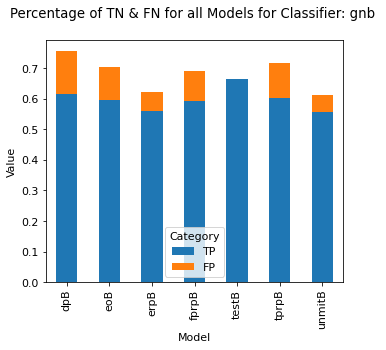

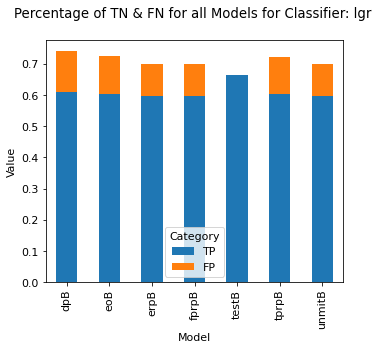

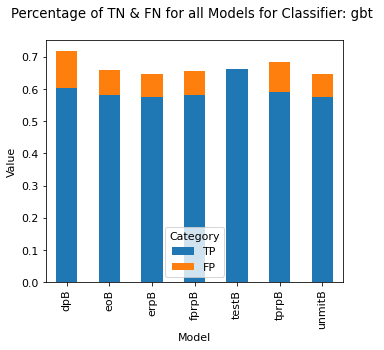

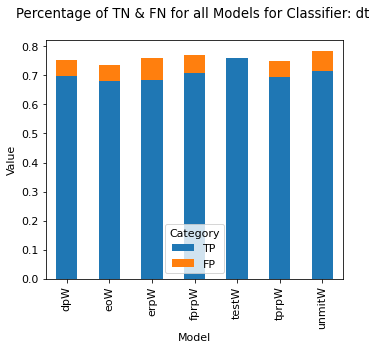

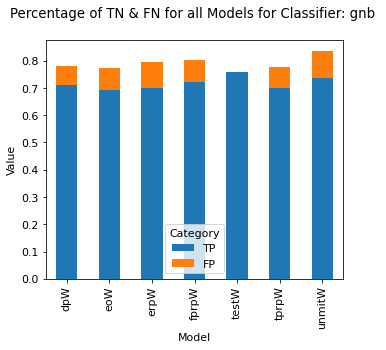

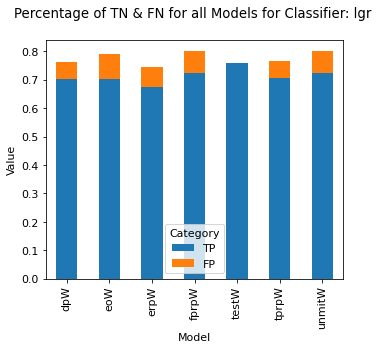

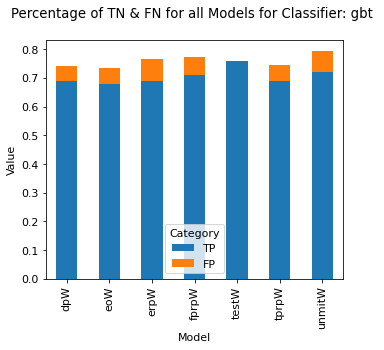

In [83]:
visualize_tpfp([dfs_b,dfs_w])
visualize_tnfn([dfs_b,dfs_w])

## 4. MWU p-Test results

In [84]:
def heatplot(path, df):
    sns.heatmap(df)
    plt.savefig(path)

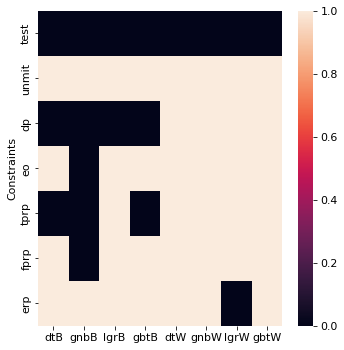

In [85]:
path_b = f'{data_path}mwu/p_un_vs_miti_B.csv'
df_b = pd.read_csv(path_b)
df_b = df_b.set_index('Constraints')
df_b[df_b >= 0.05] = 1
df_b[df_b < 0.05] = 0
path_w = f'{data_path}mwu/p_un_vs_miti_W.csv'
df_w = pd.read_csv(path_w)
df_w = df_w.set_index('Constraints')
df_w[df_w >= 0.05] = 1
df_w[df_w < 0.05] = 0
df = pd.concat([df_b,df_w], axis= 1)
heatplot(f'{data_path}plot_un_vs_mit_sig.png',df)